In [1]:
def RollingWindow(array, windows):
    n_iter = len(array) - windows - 1 
    newX = [array[i:(i+windows)] for i in range(n_iter)]
    newY = [array[i+windows] for i in range(n_iter)]
    return np.array(newX), np.array(newY)
def transformR(array):
    return np.log(array/array.shift(1))
def backwardR(arrayReturn, arrayPrice):
    return np.exp(arrayReturn) * arrayPrice.shift(1)
def plotter(y_true, y_pred, fname):
    plt.figure(figsize=(20, 6))
    plt.plot(y_true, color='#C5171C')
    plt.plot(y_pred, color='black', linewidth=2)
    plt.savefig(f'./Images/{fname}.png', bbox_inches='tight')

In [2]:
# import os
# os.path.abspath('.')

In [87]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# df = pd.read_csv('./Data/BTCUSDT-1h-data.csv')
# df = df.drop(["close_time", "quote_av","trades","tb_base_av","tb_quote_av","ignore"], axis=1)
# df.to_csv('./Data/CleanBTCUSDT-1h-data.csv', index=False)

In [ ]:
# df = pd.read_csv('./Data/BTCUSDT_1M.csv')
# df = df.drop(["close_time", "quote_av","trades","tb_base_av","tb_quote_av","ignore"], axis=1)
# df.to_csv('./Data/CleanBTCUSDT_1M.csv', index=False)

In [4]:
# df = pd.read_csv('./Data/CleanBTCUSDT-1h-data.csv')
df = pd.read_csv('./Data/CleanBTCUSDT_1M.csv')

In [5]:
df = df[round(df.shape[0]/1.2):]

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df

,timestamp,open,high,low,close,volume
0,2021-04-02 20:39:00,58783.79,58866.29,58783.79,58812.15,24.874955
1,2021-04-02 20:40:00,58812.15,58818.36,58770.01,58785.09,26.010284
2,2021-04-02 20:41:00,58785.08,58814.57,58774.18,58793.62,12.881304
3,2021-04-02 20:42:00,58793.61,58799.99,58757.57,58779.10,18.302502
4,2021-04-02 20:43:00,58779.12,58790.02,58764.19,58779.53,19.366303
...,...,...,...,...,...,...
379975,2021-12-23 07:18:00,48399.24,48407.98,48384.86,48390.19,16.975530
379976,2021-12-23 07:19:00,48390.20,48417.98,48390.19,48417.98,9.188340
379977,2021-12-23 07:20:00,48417.97,48439.82,48406.19,48430.60,7.366720
379978,2021-12-23 07:21:00,48430.61,48442.00,48419.95,48425.96,6.630590


<AxesSubplot:>

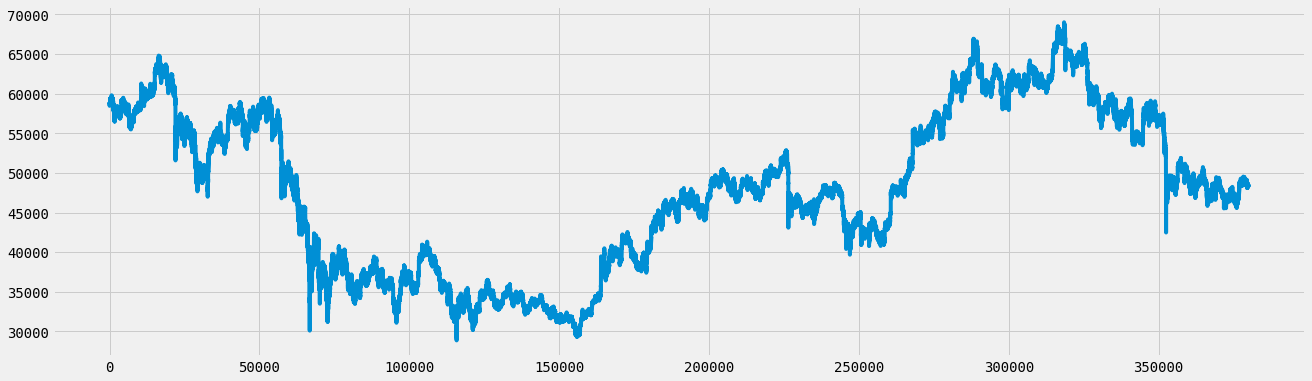

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["font.family"] = ["monospace"]

plt.figure(figsize=(20, 6))
df.close.plot()

In [9]:
close = df.close
closeR = transformR(close)
closeR.shape

(379980,)

<AxesSubplot:>

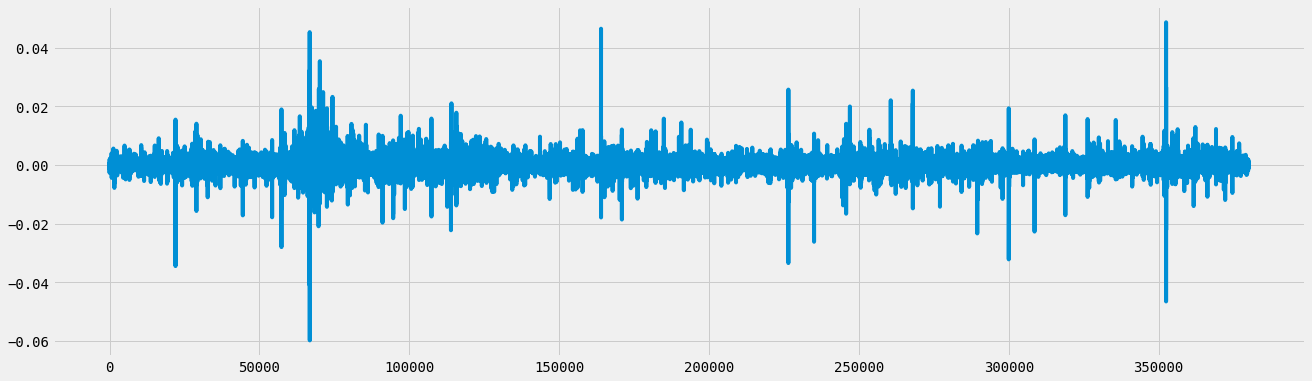

In [10]:
plt.figure(figsize=(20, 6))

closeR.plot()

In [11]:
pd.DataFrame(
    {
        'True': df.close.values,
        'Backward': backwardR(transformR(df.close), df.close).values
    }
)

,True,Backward
0,58812.15,NaN
1,58785.09,58785.09
2,58793.62,58793.62
3,58779.10,58779.10
4,58779.53,58779.53
...,...,...
379975,48390.19,48390.19
379976,48417.98,48417.98
379977,48430.60,48430.60
379978,48425.96,48425.96


In [12]:
windows = 10
zoom = 200
x, y = RollingWindow(closeR, windows)

In [13]:
High= df["high"]  
Low = df["low"] 
Open= df["open"] 
Close= df["close"]  
Volume= df["volume"]

In [14]:
import talib

df.loc[:, ('MA10')]  = talib.MA(Close, timeperiod=10).copy()
df.loc[:, ('WMA10')] = talib.WMA(Close, timeperiod=10).copy()
df.loc[:, ('EMA10')] = talib.EMA(Close, timeperiod=10).copy()
df.loc[:, ('MOM')] = talib.MOM(Close, timeperiod=10).copy()
fastk, fastd = talib.STOCHF( High ,Low, Close, fastk_period=5, fastd_period=3, fastd_matype=0)
df.loc[:, ('K')] = fastk.copy()
df.loc[:, ('D')] = fastd.copy()
df.loc[:, ('RSI-5')]  = talib.RSI(Close,timeperiod=5).copy()
df.loc[:, ('RSI-10')] = talib.RSI(Close,timeperiod=10).copy()
df.loc[:, ('威廉指標R')] = talib.WILLR(High, Low, Close, timeperiod=10).copy() # 14 --> 10
df.loc[:, ('AD')] = talib.AD(High, Low, Close, Volume).values.copy()
df.loc[:, ('CCI指標')] = talib.CCI(High, Low, Close, timeperiod=10).copy()

In [15]:
df.iloc[windows+1:, 1:]

,open,high,low,close,volume,MA10,WMA10,EMA10,MOM,K,D,RSI-5,RSI-10,威廉指標R,AD,CCI指標
11,58625.83,58682.12,58568.63,58666.72,68.827285,58723.549,58694.695636,58719.076347,-118.37,43.078612,16.821383,31.783249,21.785800,-60.382083,-96.152180,-109.816100
12,58666.72,58668.11,58602.00,58636.54,29.367215,58707.841,58678.875818,58704.069739,-157.08,35.195647,28.272518,24.883102,18.956833,-72.571590,-94.832854,-89.440925
13,58636.54,58636.55,58585.80,58596.73,23.308852,58689.604,58658.673818,58684.553422,-182.37,21.883031,33.385763,18.323790,15.925827,-88.650592,-108.101677,-96.316351
14,58596.73,58693.14,58587.57,58693.14,35.337964,58680.965,58659.316727,58686.114618,-86.39,100.000000,52.359559,54.573427,41.216640,-49.711216,-72.763713,-31.438173
15,58693.14,58699.82,58658.92,58690.47,22.100957,58673.501,58661.044909,58686.906506,-74.64,92.872932,71.585321,53.747643,40.838617,-50.789612,-60.767594,10.857938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379975,48399.24,48407.98,48384.86,48390.19,16.975530,48431.087,48417.162057,48422.213698,-98.95,9.296330,17.589296,15.785362,35.761051,-94.267278,-150097.329056,-103.571435
379976,48390.20,48417.98,48390.19,48417.98,9.188340,48427.207,48414.778966,48421.443935,-38.80,64.955956,32.419349,48.471678,47.180471,-68.278313,-150088.140716,-52.329111
379977,48417.97,48439.82,48406.19,48430.60,7.366720,48423.552,48415.395875,48423.108674,-36.55,83.464849,52.572378,57.774839,51.528205,-56.476199,-150084.813316,4.679249
379978,48430.61,48442.00,48419.95,48425.96,6.630590,48419.101,48415.833693,48423.627097,-44.51,71.928596,73.449800,53.348211,49.851851,-52.857786,-150087.829407,35.891953


In [16]:
(x.shape)

(379969, 10)

In [17]:
x_more = df.iloc[windows+1:, 1:].values
x_more_F = np.append(x, x_more, axis=1)
np.nan_to_num(x_more_F, 0)

array([[ 0.00000000e+00, -4.60214891e-04,  1.45094295e-04, ...,
        -6.03820833e+01, -9.61521803e+01, -1.09816100e+02],
       [-4.60214891e-04,  1.45094295e-04, -2.46996073e-04, ...,
        -7.25715901e+01, -9.48328545e+01, -8.94409252e+01],
       [ 1.45094295e-04, -2.46996073e-04,  7.31549866e-06, ...,
        -8.86505917e+01, -1.08101677e+02, -9.63163512e+01],
       ...,
       [-6.67588718e-04,  2.13982244e-04,  6.84976586e-05, ...,
        -5.64761994e+01, -1.50084813e+05,  4.67924853e+00],
       [ 2.13982244e-04,  6.84976586e-05, -5.40475018e-04, ...,
        -5.28577858e+01, -1.50087829e+05,  3.58919532e+01],
       [ 6.84976586e-05, -5.40475018e-04, -9.82620418e-05, ...,
        -1.88504701e+01, -1.50086942e+05,  7.70335347e+01]])

In [18]:
(x_more_F.shape, y.shape)

((379969, 26), (379969,))

In [19]:
outputs = {}

In [20]:
mse = {}

# **Train-Test-Split**

In [21]:
pct = 0.7
TrainSize = round(y.shape[0]*pct)
TestSize = y.shape[0] - TrainSize

(TrainSize, TestSize)

(265978, 113991)

In [22]:
X_train, y_train = x_more_F[:TrainSize], y[:TrainSize]
X_test, y_test = x_more_F[TrainSize:], y[TrainSize:]

In [23]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
ms.fit(X_train)
X_train_ms = ms.fit_transform(X_train)
X_test_ms = ms.fit_transform(X_test)

In [24]:
X_train_ms.shape, X_test_ms.shape

((265978, 26), (113991, 26))

In [25]:
len(X_train_ms)

265978

In [26]:
X_ms = np.append(X_train_ms, X_test_ms, axis=0)

In [27]:
X_ms.shape

(379969, 26)

# **Train**

## **RandomForest**

In [28]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100, criterion = 'squared_error')
RF.fit(X_train_ms, y_train)
RF_pred = RF.predict(X_ms)

In [97]:
RF_price = []
for i in range(len(x)):
    b = backwardR(RF_pred[i], df.close[windows+i:windows+i+3]).values
    RF_price.append(b[1])

In [127]:
RF_mse = mean_squared_error(df.close[windows+1:], RF_price)
RF_r2 = r2_score(df.close[windows+1:], RF_price)

print(f'Score: {RF_r2}\nMSE: {RF_mse}')

Score: 0.9995150365103836
MSE: 47936.123821931295


In [99]:
outputs['RF'] = RF_price
mse['RF'] = RF_mse

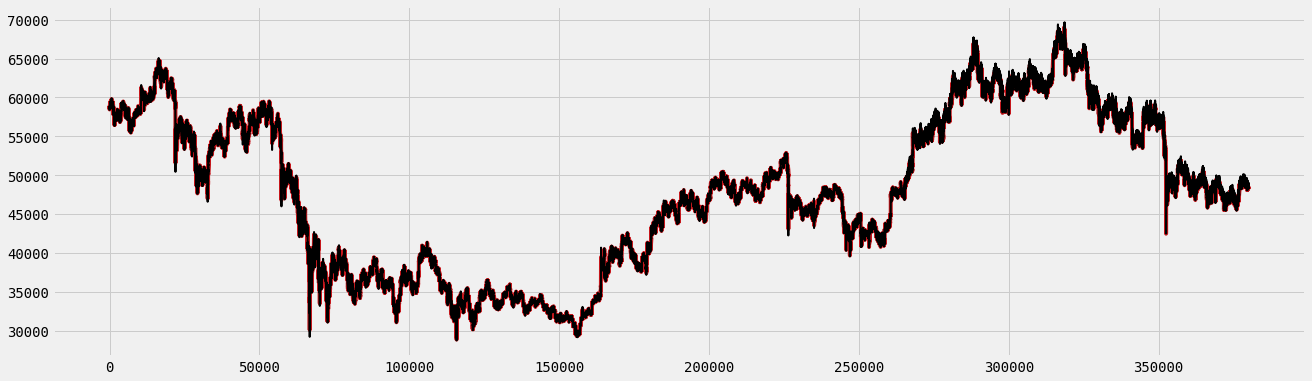

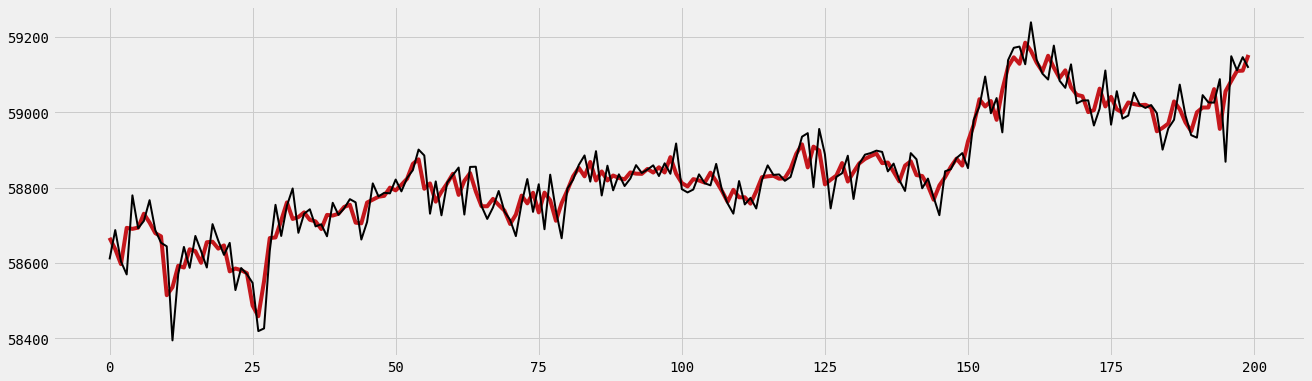

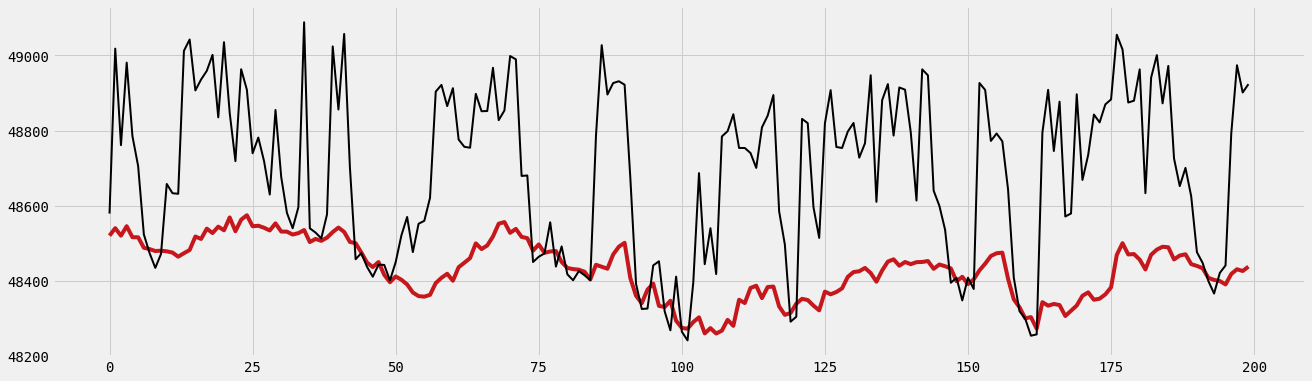

In [114]:
plotter(df.close[windows+1:].values, RF_price, 'RandomForestRegressor-2')
plotter(df.close[windows+1:].values[:zoom], RF_price[:zoom], 'RandomForestRegressor-Zoom-前')
plotter(df.close[windows+1:].values[-zoom:], RF_price[-zoom:], 'RandomForestRegressor-Zoom-後')

$$
\begin{equation}
\textrm{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^{2}\\
\textrm{R}^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^{2}}{ \sum_{i=1}^{n} (y_i - \bar{y})^{2} }
\end{equation}
$$

## **KNN**

In [49]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=3)
KNN.fit(X_train_ms, y_train)
KNN_pred = KNN.predict(X_ms)

In [101]:
KNN_price = []
for i in range(len(x)):
    b = backwardR(KNN_pred[i], df.close[windows+i:windows+i+3]).values
    KNN_price.append(b[1])

In [103]:
KNN_r2 = r2_score(df.close[windows+1:], KNN_price)
KNN_mse = mean_squared_error(df.close[windows+1:], KNN_price)

print(f'R2: {KNN_r2}\nMSE: {KNN_mse}')

R2: 0.9999476937459003
MSE: 5170.201730376391


In [104]:
outputs['KNN'] = KNN_price
mse['KNN'] = KNN_mse

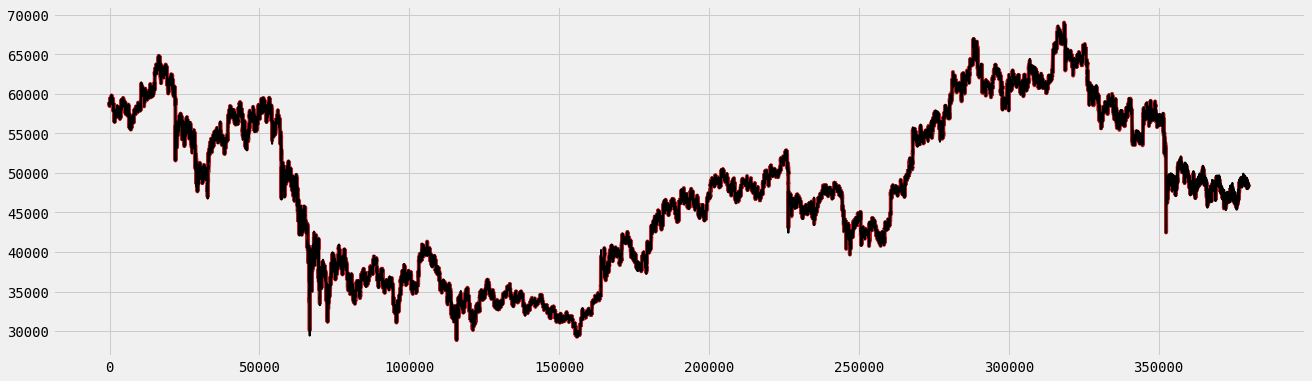

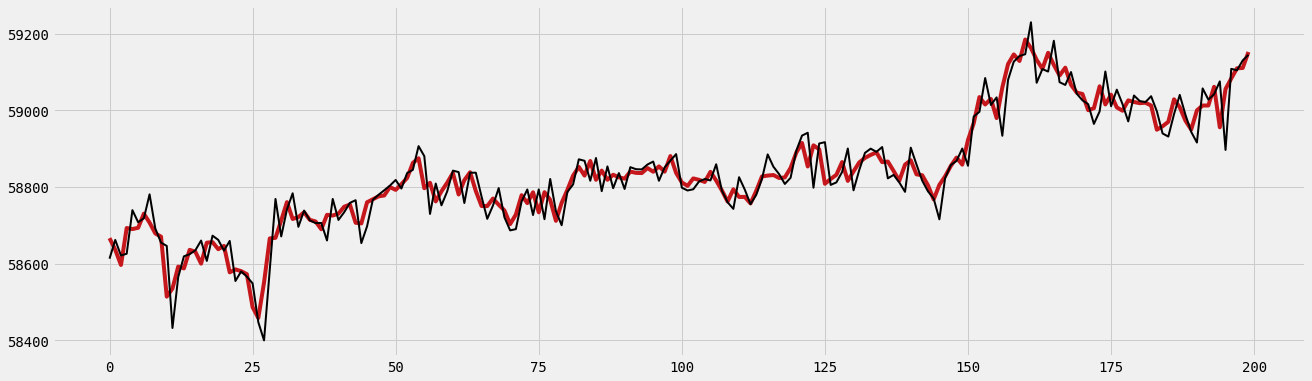

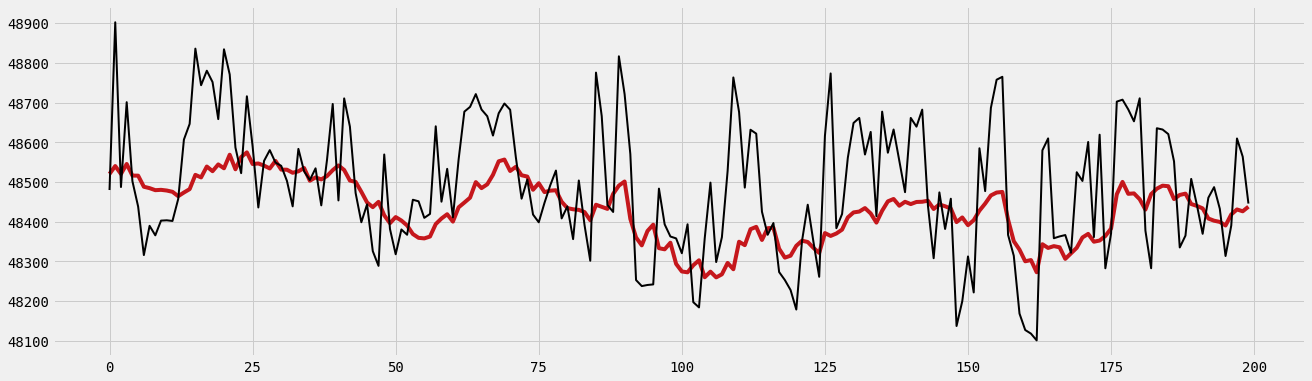

In [115]:
plotter(df.close[windows+1:].values, KNN_price, 'KNeighborsRegressor-2')
plotter(df.close[windows+1:].values[:zoom], KNN_price[:zoom], 'KNeighborsRegressor-Zoom-前')
plotter(df.close[windows+1:].values[-zoom:], KNN_price[-zoom:], 'KNeighborsRegressor-Zoom-後')

## **xgboost**

```shell
conda install -c conda-forge xgboost
```

In [62]:
import xgboost as xgb

XGB = xgb.XGBRegressor()
XGB.fit(X_train_ms, y_train)
XGB_pred = XGB.predict(X_ms)

In [106]:
XGB_price = []
for i in range(len(x)):
    b = backwardR(XGB_pred[i], df.close[windows+i:windows+i+3]).values
    XGB_price.append(b[1])

In [107]:
XGB_r2 = r2_score(df.close[windows+1:], XGB_price)
XGB_mse = mean_squared_error(df.close[windows+1:], XGB_price)
print(f'R2: {XGB_r2}\nMSE: {XGB_mse}')

R2: 0.9957645101153589
MSE: 418656.19145333365


In [108]:
outputs['XGB'] = XGB_price
mse['XGB'] = XGB_mse

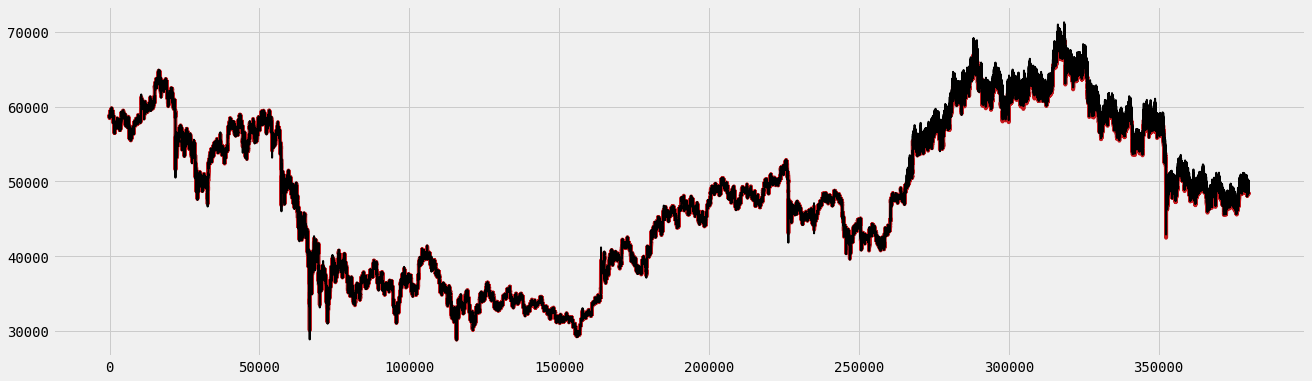

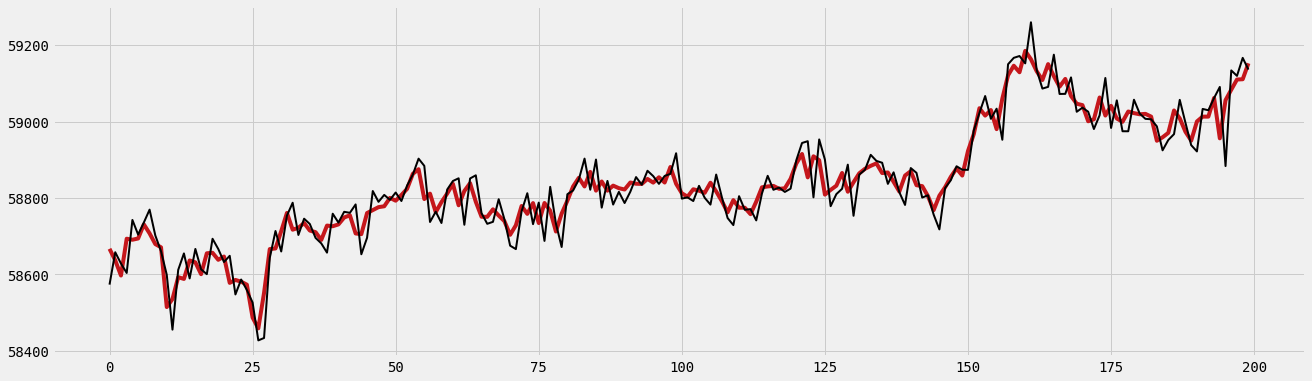

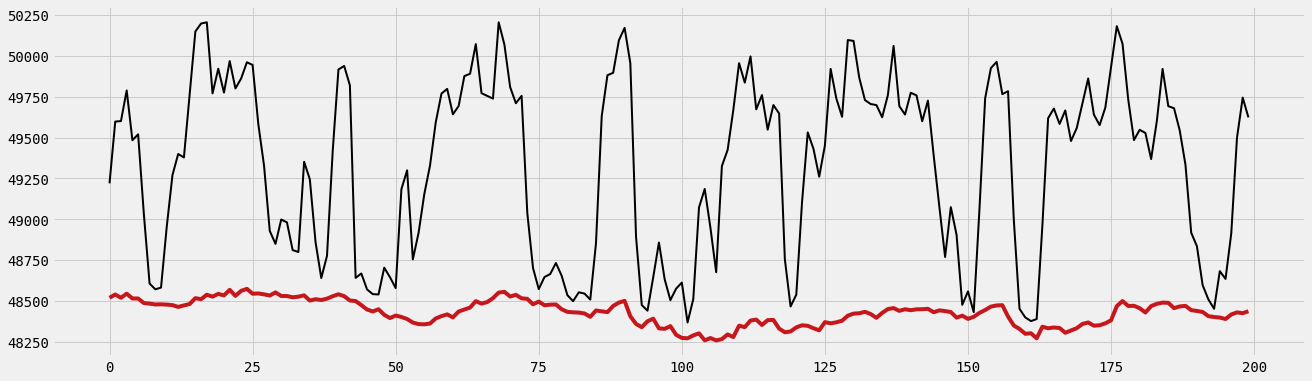

In [113]:
plotter(df.close[windows+1:].values, XGB_price, 'xgboost-2')
plotter(df.close[windows+1:].values[:zoom], XGB_price[:zoom], 'xgboost-Zoom-前')
plotter(df.close[windows+1:].values[-zoom:], XGB_price[-zoom:], 'xgboost-Zoom-後')

In [111]:
((1-XGB_r2)*50000)**2

44848.436407241934

In [116]:
outputs_df = pd.DataFrame(outputs)
mse_df = pd.DataFrame(mse, index=[0])

In [117]:
outputs_df.to_csv('./Data/ouputs_r-2.csv', index=False)
mse_df.to_csv('./Data/mse_r-2.csv', index=False)

In [129]:
mean_squared_error(df.close[windows+1:], RF_price)

47936.123821931295